## Simulation of a DC-Motor

In [2]:
#imports
import sys
import matplotlib.pyplot as plt
sys.path.append('../../BlockFlow')
import BlockFlow as bf
from Model_Demo import DC_Motor

### 1. Create Blocks
(create custom models first, if necessary --> check ```Model_Demo.py```)

In [8]:
# plant input (voltage, torque)
u = bf.Block(bf.Const([10.0, 0.0]))
# plant
motor = bf.Block(DC_Motor(), solver = 'rk4')
# plant output
phi = bf.Selector([0])
omega = bf.Selector([1])

### 2. Create BlockFlow-graph

In [9]:
# create block flow graph...
bfg = bf.BlockFlowGraph()

# ...add blocks...
bfg.add([u,plant,phi,omega])

# ...and connect
bfg.connect(u, plant)
bfg.connect(plant, phi)
bfg.connect(plant, omega)

### 3. Simulate

In [10]:
# simulate
bfg.run(0.5)
print('ready')

ready


### 4. Plot results

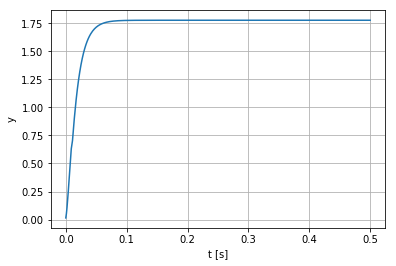

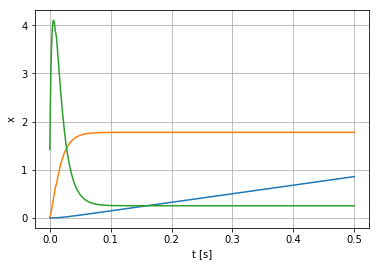

In [20]:
# plot result
t_omega = bfg.t[omega.id]
y_omega = bfg.y[omega.id][:,:,0]
t_x = bfg.t[plant.id]
x_ = bfg.x[plant.id][:,0:3,0]

plt.plot(t_omega, y_omega)
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('y')
plt.show()

plt.plot(t_x, x_)
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('x')
plt.show()